<a href="https://colab.research.google.com/github/MrCamilo5/cplex-python/blob/master/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

In [0]:
n=5 #11
ciudades=[i for i in range(n)] # Creamos ciudades de la 0 a la 9  
arcos =[(i,j) for i in ciudades for j in ciudades if i!=j]

In [0]:
#Ahora crearemos las cordenadas para cada ciudad.
random=np.random
random.seed(1999)
coord_x=random.rand(n)*100
coord_y=random.rand(n)*100
print(" Cordenadas de X para todas las ciudades")
print(coord_x)
print("---------------------------------------------------------------------")
print(" Cordenadas de y para todas las ciudades")
print(coord_y)

 Cordenadas de X para todas las ciudades
[82.45201737 98.46267585 89.31445167 31.96469146 59.32567042]
---------------------------------------------------------------------
 Cordenadas de y para todas las ciudades
[19.54923175 86.02167602 86.43005143  7.86178477 71.69120746]


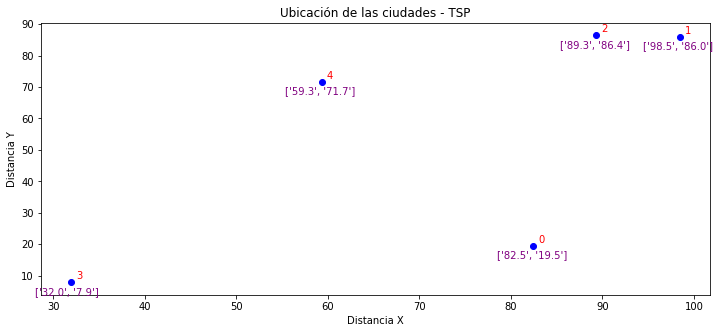

In [0]:
x=coord_x
y=coord_y

plt.figure(figsize=(12,5))
plt.scatter(x,y,color='blue')
s=[]
for n in range(len(coord_x)):
    s_temp=[]
    s_temp.append("%.1f" %coord_x[n])
    s_temp.append("%.1f" %coord_y[n])
    s.append(s_temp)

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")

for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]-4,coord_y[n]-4), 
                 color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='red')

plt.show()

In [0]:
#Ahora debemos crear un link entre las las ciudades, sus coordenadas y la distancia entre ellas.

#Los parentesis de llave significan que es un diccionario { }.De esta manera creamos un link
# entre los arcos y la distancia.

distancia={(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i,j in arcos}

In [0]:
distancia

{(0, 1): 68.37343806617604,
 (0, 2): 67.23196446784411,
 (0, 3): 51.82245164506763,
 (0, 4): 57.04045542221181,
 (1, 0): 68.37343806617604,
 (1, 2): 9.157334553872236,
 (1, 3): 102.62041964845719,
 (1, 4): 41.678142030251294,
 (2, 0): 67.23196446784411,
 (2, 1): 9.157334553872236,
 (2, 3): 97.27264529399963,
 (2, 4): 33.41497452186884,
 (3, 0): 51.82245164506763,
 (3, 1): 102.62041964845719,
 (3, 2): 97.27264529399963,
 (3, 4): 69.44651446361064,
 (4, 0): 57.04045542221181,
 (4, 1): 41.678142030251294,
 (4, 2): 33.41497452186884,
 (4, 3): 69.44651446361064}

In [0]:
# Creando el modelo en Cplex
mdl=Model('TSP')

In [0]:
#Declaramos las variables a utilizar
#los nombre y forma de llamar las variables es propia de CPLEX.

x=mdl.binary_var_dict(arcos,name='x')
d=mdl.continuous_var_dict(ciudades,name='d')

In [0]:
mdl.minimize(mdl.sum(distancia[i]*x[i] for i in arcos))

In [0]:
# Primero restricción sumatoria para todo i
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i==c)==1, ctname='out_%d'%c)

In [0]:
# Segundo restricción sumatoria para todo j
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j==c)==1, ctname='in_%d'%c)

In [0]:
# Por último restricción lógica
for i,j in arcos:
    if j!=0:
        mdl.add_indicator(x[(i,j)],d[i]+1==d[j], name='order_(%d,_%d)'%(i, j))

In [0]:
mdl.parameters.timelimit=120
mdl.parameters.mip.strategy.branch=1
mdl.parameters.mip.tolerances.mipgap=0.15

solucion = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Strategy_Branch                     1
CPXPARAM_TimeLimit                               120
CPXPARAM_MIP_Tolerances_MIPGap                   0.14999999999999999
Tried aggregator 2 times.
MIP Presolve modified 6 coefficients.
Aggregator did 6 substitutions.
Reduced MIP has 20 rows, 35 columns, and 70 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 16 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Found incumbent of value 341.087311 after 0.01 sec. (0.18 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Tried aggregator 1 time.
Reduced MIP has 20 rows, 35 columns, and 70 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 16 indicators.
Presolve time = 0.00 sec. (0.05 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Clique table members: 16.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root relaxation solution tim

In [0]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [0]:
solucion.display()

solution for: TSP
objective: 232.215
x_0_3 = 1
x_1_0 = 1
x_2_1 = 1
x_3_4 = 1
x_4_2 = 1
d_1 = 4.000
d_2 = 3.000
d_3 = 1.000
d_4 = 2.000


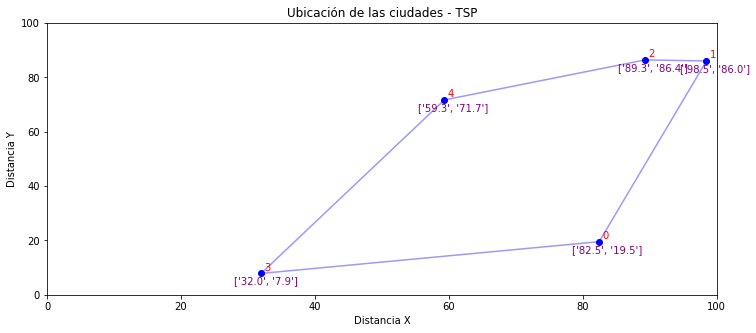

In [0]:
#Imprimiento la solución óptima.

plt.figure(figsize=(12,5))
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")


arcos_activos = [i for i in arcos if x[i].solution_value > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='blue', zorder=1)
    
for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]-4,coord_y[n]-4), color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]+0.5,coord_y[n]+1),color='red')
    
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()